<center><a target="_blank" href="http://www.propulsion.academy"><img src="https://drive.google.com/uc?id=1McNxpNrSwfqu1w-QtlOmPSmfULvkkMQV" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

<center> <h1> Interpretable Machine Learning (Live coding) </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>Propulsion Academy, 2021</center>

# Load Dependencies

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 10.2 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import shap
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Data generation

In [ ]:
from sklearn.datasets import load_boston
res = load_boston(return_X_y=False)

X = res.data
y = res.target
X.shape, y.shape

((506, 13), (506,))

In [ ]:
print(res.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
features = res.feature_names

X = pd.DataFrame(X, columns=features)
y = pd.DataFrame({'Price': y})

X.head()

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]

In [ ]:
y.head()

Price
0   24.0
1   21.6
2   34.7
3   33.4
4   36.2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((404, 13), (102, 13))

# Interpreting Regression Models

We will look at how to interpret a variety of regression models here:

- Linear Regression
- KNN Regression
- XGBoost Regression

## Interpreting Linear Regression Model

### Train and Evaluate Model Performance

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
print(r2_score(y_test, pred_lr))
print(mean_squared_error(y_test, pred_lr))

0.6687594935356307
24.291119474973616


### Create SHAP Explainer & Compute SHAP values

In [ ]:
explainer = shap.KernelExplainer(lr.predict, data=X_train)

Using 404 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/102 [00:00<?, ?it/s]

### View SHAP values

In [ ]:
X_test.head(3)

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
173  0.09178   0.0   4.05   0.0  0.510  ...  5.0  296.0     16.6  395.50   9.04
274  0.05644  40.0   6.41   1.0  0.447  ...  4.0  254.0     17.6  396.90   3.53
491  0.10574   0.0  27.74   0.0  0.609  ...  4.0  711.0     20.1  390.11  18.07

[3 rows x 13 columns]

In [ ]:
shap_values = shap_values[0]

In [ ]:
pd.DataFrame(shap_values, columns=X_test.columns).head(3)

CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0  0.397657 -0.348357 -0.280042  ...  1.573044  0.484440  1.737967
1  0.401652  0.856061 -0.184744  ...  0.657588  0.501732  4.540196
2  0.396078 -0.348357  0.676577  ... -1.631053  0.417866 -2.854433

[3 rows x 13 columns]

### Global Interpretation - Feature Importance Globally

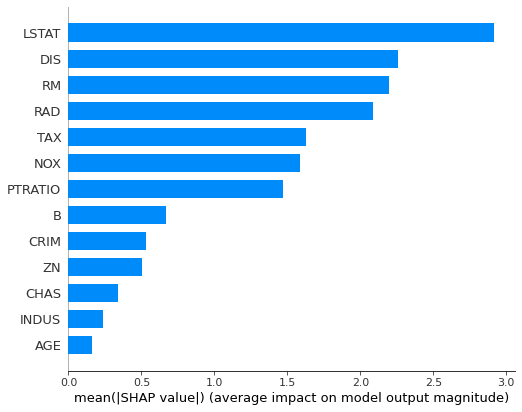

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

### Local Interpretations

In [ ]:
explainer.expected_value

array([22.79653465])

In [ ]:
y_test.iloc[10].values, pred_lr[10]

(array([21.5]), array([24.90850512]))

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[10, :], X_test.iloc[10, :])

In [ ]:
y_test.iloc[1].values, pred_lr[1]

(array([32.4]), array([36.02556534]))

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1, :], X_test.iloc[1, :])

### Partial Dependence Plots

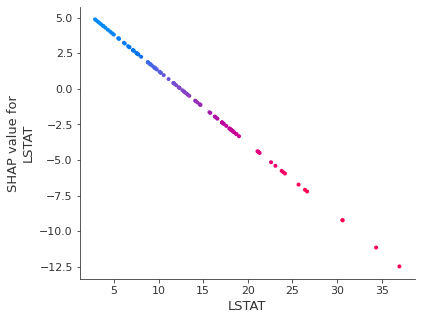

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='LSTAT',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

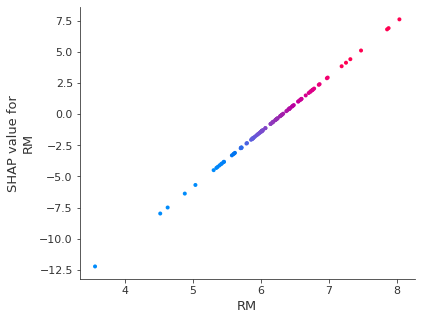

In [ ]:
shap.dependence_plot(ind='RM', interaction_index='RM',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

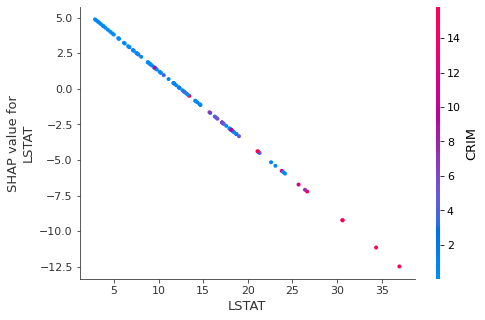

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='CRIM',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

## Interpreting KNN Regression Model

### Train and Evaluate Model Performance

In [ ]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

pred_knn = knn.predict(X_test)
print(r2_score(y_test, pred_knn))
print(mean_squared_error(y_test, pred_knn))

0.7046442656646525
21.65955337690632


### Create SHAP Explainer & Compute SHAP values

In [ ]:
explainer = shap.KernelExplainer(knn.predict, data=shap.kmeans(X_train,100)) # X_train.sample(100)
shap_values = explainer.shap_values(X_test)

  0%|          | 0/102 [00:00<?, ?it/s]

In [ ]:
shap_values = shap_values[0]

In [ ]:
X_test.head(3)

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
173  0.09178   0.0   4.05   0.0  0.510  ...  5.0  296.0     16.6  395.50   9.04
274  0.05644  40.0   6.41   1.0  0.447  ...  4.0  254.0     17.6  396.90   3.53
491  0.10574   0.0  27.74   0.0  0.609  ...  4.0  711.0     20.1  390.11  18.07

[3 rows x 13 columns]

In [ ]:
pd.DataFrame(shap_values, columns=X_test.columns).head(3)

CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0  0.281666 -0.224117  0.696272  ...  0.218479  0.394363  1.410836
1  0.165205  2.652359  0.295819  ...  0.032466  0.896890  1.631875
2  0.215068 -0.613909 -0.250040  ... -0.089812  0.136009 -3.358398

[3 rows x 13 columns]

### Global Interpretation - Feature Importance Globally

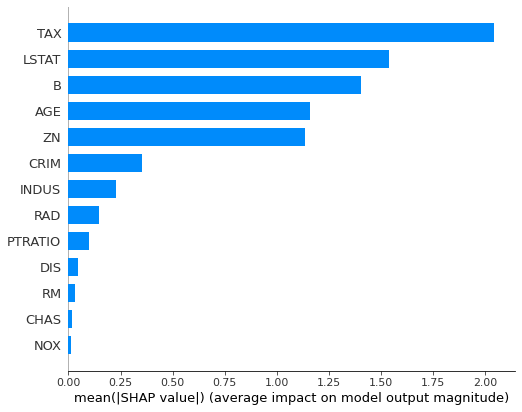

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

### Local Interpretations

In [ ]:
explainer.expected_value

array([22.59315182])

In [ ]:
y_test.iloc[10].values, pred_knn[10]

(array([21.5]), array([23.66666667]))

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[10, :], X_test.iloc[10, :])

In [ ]:
y_test.iloc[1].values, pred_knn[1]

(array([32.4]), array([32.76666667]))

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1, :], X_test.iloc[1, :])

### Partial Dependence Plots

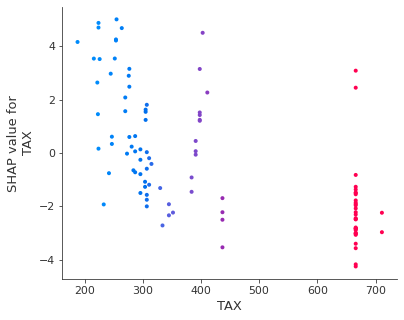

In [ ]:
shap.dependence_plot(ind='TAX', interaction_index='TAX',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

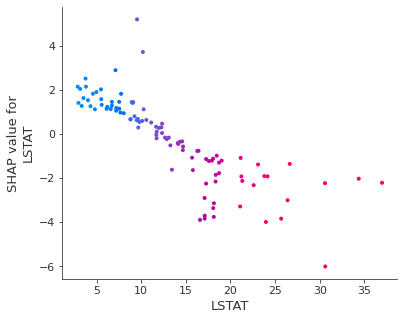

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='LSTAT',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

## Interpreting XGBoost Regression Model

### Train and Evaluate Model Performance

In [ ]:
from xgboost import XGBRegressor


xgb = XGBRegressor()
xgb.fit(X_train, y_train)

pred_xgb = xgb.predict(X_test)
print(r2_score(y_test, pred_xgb))
print(mean_squared_error(y_test, pred_xgb))

[13:37:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9009088645475026
7.2667278403836315


### Create SHAP Explainer & Compute SHAP values

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

In [ ]:
pd.DataFrame(shap_values, columns=X_test.columns).head(3)

CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0  0.361921 -0.015306  0.076457  ...  0.802961  0.119537  1.526713
1 -0.270764  0.053174 -0.083627  ...  0.310154  0.096850  7.639766
2  0.624302 -0.012162 -0.165563  ... -0.867942  0.130011 -3.443803

[3 rows x 13 columns]

In [ ]:
X_test.head(3)

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
173  0.09178   0.0   4.05   0.0  0.510  ...  5.0  296.0     16.6  395.50   9.04
274  0.05644  40.0   6.41   1.0  0.447  ...  4.0  254.0     17.6  396.90   3.53
491  0.10574   0.0  27.74   0.0  0.609  ...  4.0  711.0     20.1  390.11  18.07

[3 rows x 13 columns]

### Global Interpretation - Feature Importance Globally

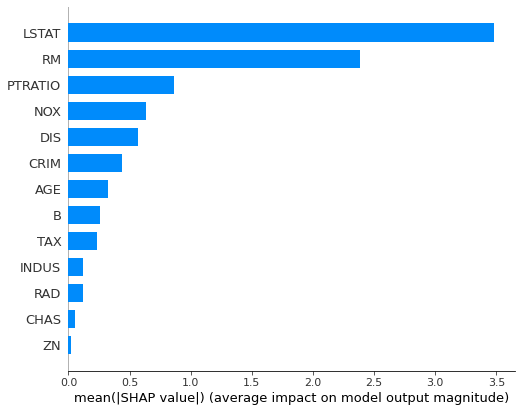

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

### Local Interpretations

In [ ]:
explainer.expected_value

22.79454

In [ ]:
y_test.iloc[10].values, pred_xgb[10]

(array([21.5]), 20.37035)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[10, :], X_test.iloc[10, :])

In [ ]:
y_test.iloc[1].values, pred_xgb[1]

(array([32.4]), 31.71124)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1, :], X_test.iloc[1, :])

### Dependence Plots

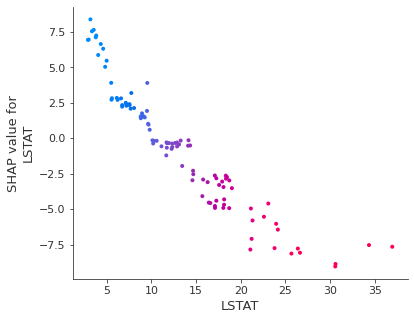

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='LSTAT',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

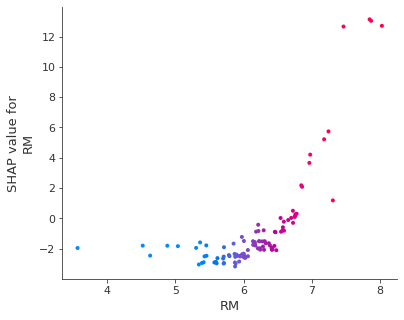

In [ ]:
shap.dependence_plot(ind='RM', interaction_index='RM',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

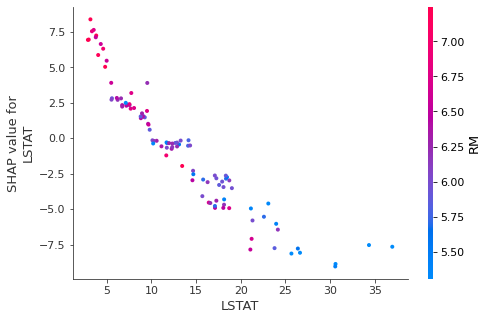

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='RM',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

# Interpreting Classification Models

We will look at how to interpret a variety of classification models here:

- Logistic Regression
- XGBoost Classifier

## Dataset Preparation

Boston Houses Classification

- Price > \$ 30K is Class Label 1

- Price <= \$ 30K is Class Label 0 

In [ ]:
y['Price'] = (y['Price'] > 30).astype(int)
y['Price'].head()

0    0
1    0
2    1
3    1
4    1
Name: Price, dtype: int64

In [ ]:
y['Price'].value_counts()

0    422
1     84
Name: Price, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y['Price'], test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((404, 13), (102, 13))

## Interpreting Logistic Regression Model


### Train and Evaluate Model Performance

In [ ]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(solver='liblinear')
lor.fit(X_train, y_train)

pred_lor = lor.predict(X_test)

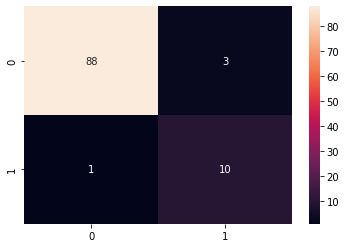

In [ ]:
cf = confusion_matrix(y_test, pred_lor)
sns.heatmap(cf, annot=True);

In [ ]:
print(classification_report(y_test, pred_lor))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        91
           1       0.77      0.91      0.83        11

    accuracy                           0.96       102
   macro avg       0.88      0.94      0.91       102
weighted avg       0.97      0.96      0.96       102



### Create SHAP Explainer & Compute SHAP values

In [ ]:
explainer = shap.KernelExplainer(lor.predict, data=X_train)
shap_values = explainer.shap_values(X_test)

Using 404 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/102 [00:00<?, ?it/s]

### View SHAP values

In [ ]:
X_test.head(3)

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
173  0.09178   0.0   4.05   0.0  0.510  ...  5.0  296.0     16.6  395.50   9.04
274  0.05644  40.0   6.41   1.0  0.447  ...  4.0  254.0     17.6  396.90   3.53
491  0.10574   0.0  27.74   0.0  0.609  ...  4.0  711.0     20.1  390.11  18.07

[3 rows x 13 columns]

In [ ]:
pd.DataFrame(shap_values, columns=X_test.columns).head(3)

CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0 -0.012323 -0.053798  0.029858  ... -0.004050  0.009962 -0.107657
1 -0.009803  0.060261  0.088415  ...  0.062624  0.028147  0.460583
2 -0.000363 -0.010861 -0.044150  ... -0.024182  0.001148 -0.057077

[3 rows x 13 columns]

### Global Interpretation - Feature Importance Globally

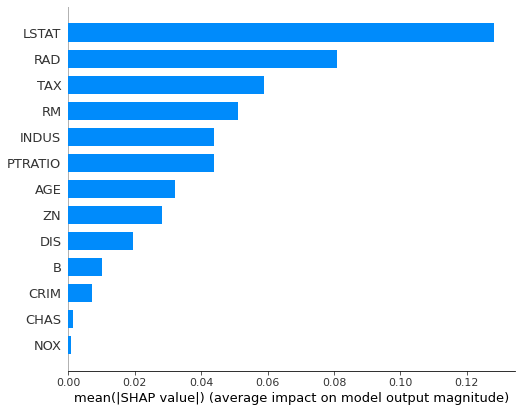

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

### Local Interpretations

In [ ]:
explainer.expected_value

0.1782178217821782

In [ ]:
y_test.iloc[10], pred_lor[10]

(0, 0)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[10, :], X_test.iloc[10, :])

In [ ]:
y_test.iloc[1], pred_lor[1]

(1, 1)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1, :], X_test.iloc[1, :])

### Partial Dependence Plots

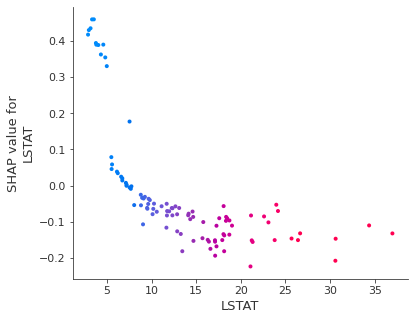

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='LSTAT',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

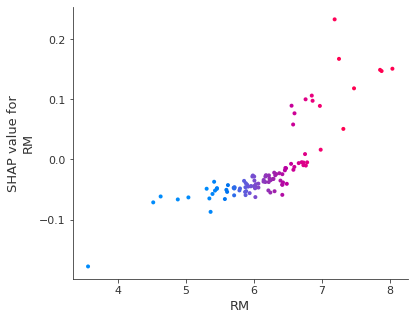

In [ ]:
shap.dependence_plot(ind='RM', interaction_index='RM',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

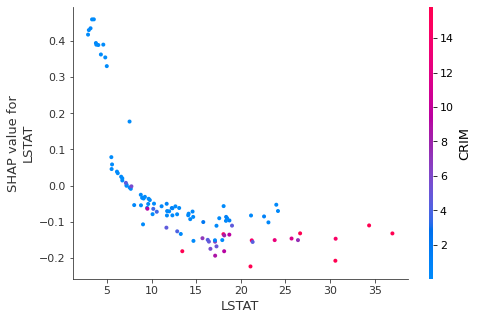

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='CRIM',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

## Interpreting XGBoost Classifier Model


### Train and Evaluate Model Performance

In [ ]:
from xgboost import XGBClassifier


xgb = XGBClassifier()
xgb.fit(X_train, y_train)

pred_xgb = xgb.predict(X_test)

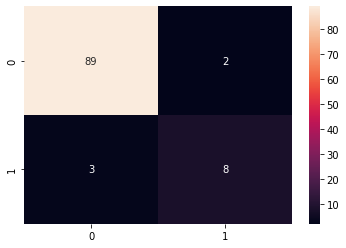

In [ ]:
cf = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cf, annot=True);

In [ ]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        91
           1       0.80      0.73      0.76        11

    accuracy                           0.95       102
   macro avg       0.88      0.85      0.87       102
weighted avg       0.95      0.95      0.95       102



### Create SHAP Explainer & Compute SHAP values

In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

### View SHAP values

In [ ]:
X_test.head(3)

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
173  0.09178   0.0   4.05   0.0  0.510  ...  5.0  296.0     16.6  395.50   9.04
274  0.05644  40.0   6.41   1.0  0.447  ...  4.0  254.0     17.6  396.90   3.53
491  0.10574   0.0  27.74   0.0  0.609  ...  4.0  711.0     20.1  390.11  18.07

[3 rows x 13 columns]

In [ ]:
pd.DataFrame(shap_values, columns=X_test.columns).head(3)

CRIM        ZN     INDUS  CHAS  ...       TAX   PTRATIO         B     LSTAT
0  0.410493 -0.060440 -0.324672   0.0  ... -0.374684  0.426760  0.203956  0.539817
1 -0.657067  0.092154 -0.201271   0.0  ...  0.376124  0.552685  0.339106  2.350740
2  0.148121 -0.068638 -0.464081   0.0  ... -0.289846 -0.549669 -0.067194 -2.293152

[3 rows x 13 columns]

### Global Interpretation - Feature Importance Globally

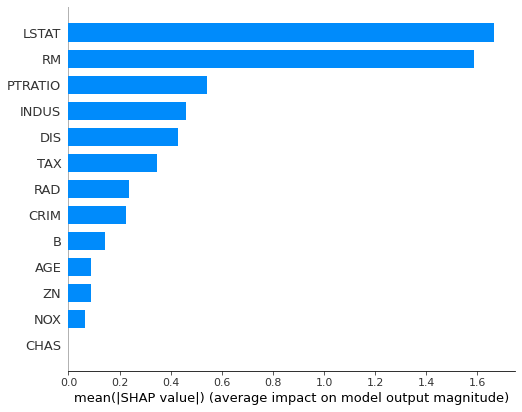

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

### Local Interpretations

In [ ]:
explainer.expected_value

-2.3558486

In [ ]:
y_test.iloc[10], pred_xgb[10]

(0, 0)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[10, :], X_test.iloc[10, :])

In [ ]:
y_test.iloc[1], pred_xgb[1]

(1, 1)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1, :], X_test.iloc[1, :])

### Partial Dependence Plots

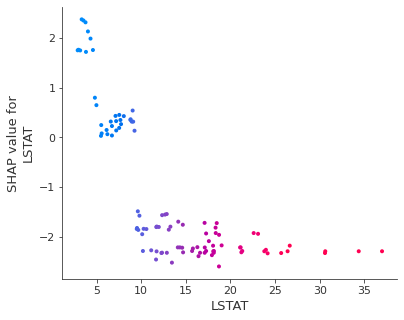

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='LSTAT',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

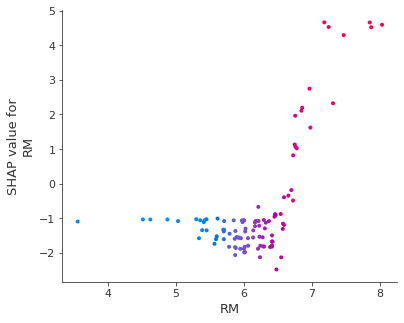

In [ ]:
shap.dependence_plot(ind='RM', interaction_index='RM',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

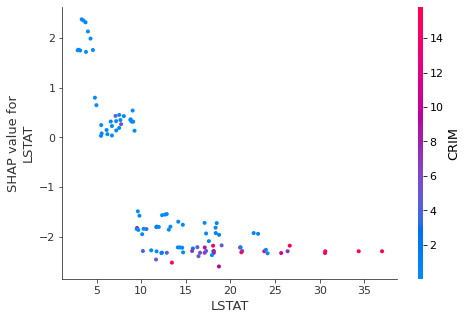

In [ ]:
shap.dependence_plot(ind='LSTAT', interaction_index='CRIM',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)